In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
np.set_printoptions(precision=4)

### Carga dos dados

In [4]:
df_seg = pd.read_json("./datasets/extracao-segmentos-atos.json")

### Estrutura da fonte de dados

In [6]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206488 entries, 0 to 206487
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id_ato    206488 non-null  int64 
 1   data_pub  206488 non-null  object
 2   tipo_ato  206488 non-null  object
 3   id_seg    206488 non-null  int64 
 4   tipo_seg  206488 non-null  object
 5   txt_seg   206488 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.5+ MB


In [7]:
# Conversão do atributo data_publicacao para formato de data
df_seg['data_pub'] = pd.to_datetime(df_seg['data_pub'])

### Análise da quantidade de atos por tipo de ato

In [8]:
qtd_ato_por_tipo = df_seg[['tipo_ato', 'id_ato']].groupby('tipo_ato')['id_ato'].nunique()
df_qtd_ato_por_tipo = pd.DataFrame(qtd_ato_por_tipo)
df_qtd_ato_por_tipo.columns = ['qtd_ato']
df_qtd_ato_por_tipo.reset_index(inplace=True)
df_qtd_ato_por_tipo.sort_values(by='qtd_ato', ascending=False, inplace=True, ignore_index=True)

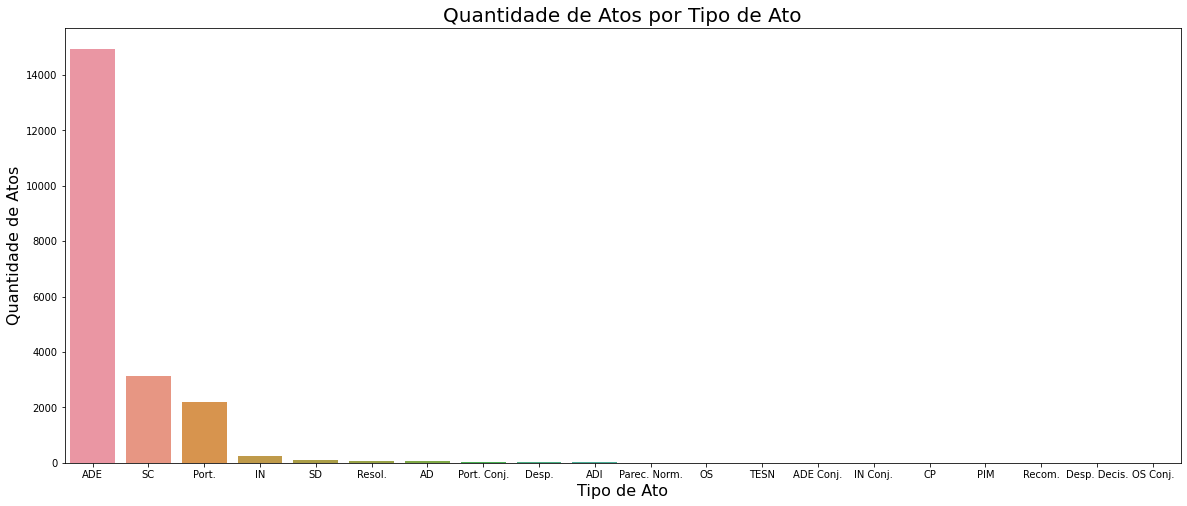

In [9]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_ato', y='qtd_ato', data=df_qtd_ato_por_tipo)
ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

### Análise da quantidade de segmentos por tipo de segmento

In [11]:
qtd_seg_tipo = df_seg[['id_seg', 'tipo_seg']].groupby('tipo_seg').count().sort_values("id_seg", ascending=False)
qtd_seg_tipo.columns = ['qtd_seg']
qtd_seg_tipo.reset_index(inplace=True)

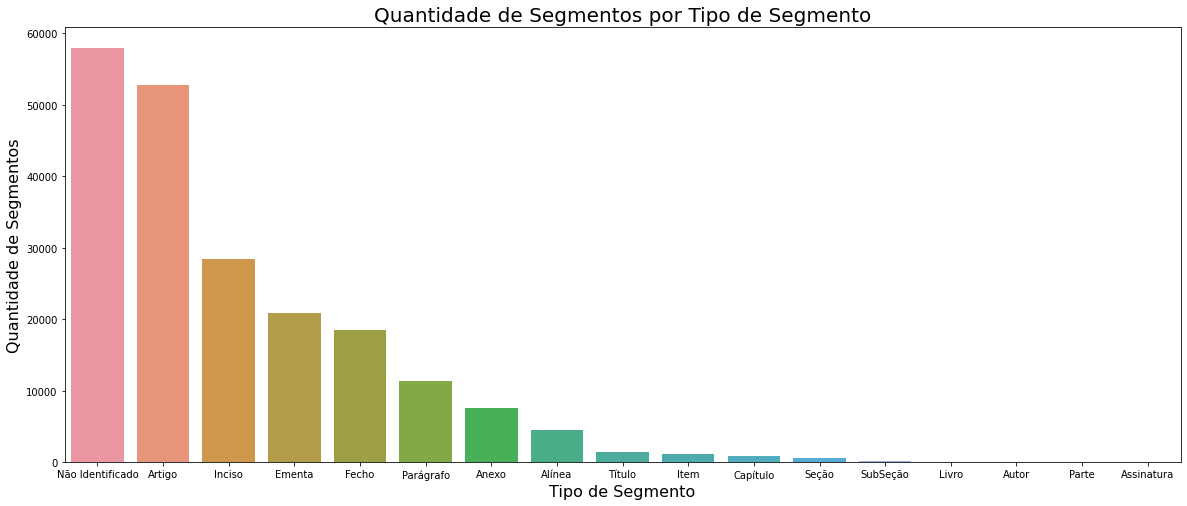

In [12]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_seg', y='qtd_seg', data=qtd_seg_tipo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

### Análise da quantidade de segmentos não identificados por ano

In [13]:
qtd_seg_ano = df_seg[df_seg['tipo_seg']=='Não Identificado'].groupby(df_seg['data_pub'].dt.year)['id_seg'].count()
df_qtd_seg_ano = pd.DataFrame(qtd_seg_ano)
df_qtd_seg_ano.reset_index(inplace=True)
df_qtd_seg_ano.columns = ['ano_pub', 'qtd_seg']

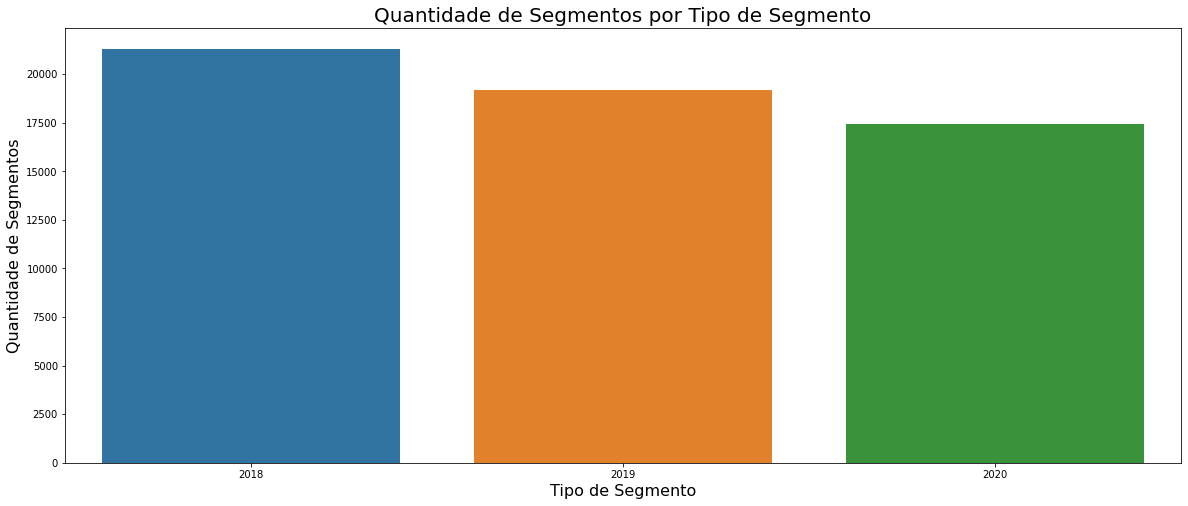

In [15]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='ano_pub', y='qtd_seg', data=df_qtd_seg_ano)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()